# Netflix Dataset Analysis

---

### Major Project Proposal: Netflix Dataset Analysis

#### Introduction to Dataset
The dataset under consideration is a Netflix dataset containing 7,789 records and 11 columns. It includes important details about Movies and TV Shows available on the platform. Key attributes include the title, director, cast, country of origin, release date, rating, duration, and type (genres). The dataset spans multiple years, with entries ranging from 2008 to 2021, covering content across diverse countries and genres.

#### Problem Statement
Netflix has become one of the most prominent global streaming platforms, continuously expanding its library with a mix of original productions and licensed content. However, with growing competition from platforms like Amazon Prime, Disney+, and regional OTT providers, Netflix must strategically analyze its content catalog to identify strengths, gaps, and opportunities.
The specific problem to be addressed in this project is 'Content Trends Analysis for Strategic Recommendations'. The aim is to uncover how Netflix’s content distribution (Movies vs. TV Shows, genres, and country contributions) has evolved over the years. This will enable the identification of key genres, audience preferences, and strategic insights into global content expansion.

#### Importance of the Problem Statement
Understanding Netflix’s content trends is crucial for making data-driven business decisions. The analysis not only highlights the balance between Movies and TV Shows but also reveals popular genres and underrepresented categories. For a platform that serves diverse international audiences, country-wise contributions provide valuable insights into global representation and market penetration.
By focusing on these content trends, Netflix can refine its strategy for content acquisition and production, ensuring that it caters to the right audience segments while staying competitive in the global OTT industry.

#### Objectives
*   Analyze the distribution of Movies vs. TV Shows over the years.
*   Identify the most common genres and how their popularity has changed.
*   Compare country-wise contributions to Netflix’s catalog.

#### Expected Outcomes
*   A clear understanding of how Netflix’s content strategy has evolved.
*   Identification of top-performing genres and categories.
*   Strategic recommendations on which content types Netflix should focus on in the future.

In [2]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for plots
sns.set_style('whitegrid')

# Set a random seed for reproducibility of any random operations
np.random.seed(42)

# Print the versions of the libraries to ensure the environment is reproducible
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")

Pandas version: 2.2.2
NumPy version: 2.0.2
Seaborn version: 0.13.2


In [3]:
# Define the path to the dataset file
file_path = 'Netflix Dataset.csv'

# Try to load the dataset into a pandas DataFrame
try:
    df = pd.read_csv(file_path)
    # Print the shape of the DataFrame to see the number of rows and columns
    print(f"Dataset loaded successfully with shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the CSV file is in the same directory as the notebook.")
    df = None # Set df to None if file is not found

Dataset loaded successfully with shape: (7789, 11)


In [4]:
# Display the first 5 rows of the DataFrame
if df is not None:
    display(df.head())

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Display a random sample of 5 rows from the DataFrame
if df is not None:
    display(df.sample(5))

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
5832,s5832,Movie,Strange but True,Rowan Athale,"Amy Ryan, Nick Robinson, Margaret Qualley, Gre...",Canada,"August 30, 2020",PG-13,96 min,"Dramas, Thrillers",A young woman rattles her former boyfriend’s f...
5937,s5937,Movie,Swearnet: The Movie,Warren P. Sonoda,"Mike Smith, John Paul Tremblay, Robb Wells, Pa...",Canada,"September 24, 2017",NC-17,112 min,"Comedies, International Movies","After losing a TV network deal, the Trailer Pa..."
1323,s1324,TV Show,Chicago Typewriter,NaN,"Yoo Ah-in, Im Soo-jung, Ko Kyoung-pyo, Kwak Si...",South Korea,"October 1, 2019",TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A veterinarian and two writers have a mysterio...
5108,s5108,Movie,"Ray Romano: Right Here, Around the Corner",Michael Showalter,Ray Romano,United States,"February 5, 2019",TV-MA,59 min,Stand-Up Comedy,Ray Romano cut his stand-up teeth at the Comed...
101,s102,Movie,3 Seconds Divorce,Shazia Javed,NaN,Canada,"June 15, 2019",TV-PG,53 min,"Documentaries, Faith & Spirituality",A Muslim women's activist group in India prote...


In [6]:
if df is not None:
    # Get a concise summary of the dataframe, including data types and non-null values
    print("--- Data Types and Non-Null Counts ---")
    df.info()
    print("\n" + "="*40 + "\n")

    # Get the count of missing values for each column
    print("--- Missing Values Count ---")
    print(df.isnull().sum())
    print("\n" + "="*40 + "\n")

    # Get the number of unique values for key categorical columns
    print("--- Unique Value Counts ---")
    # Check if columns exist before trying to access them
    if 'Category' in df.columns:
        print(f"Unique 'Category' values: {df['Category'].nunique()}")
    if 'Country' in df.columns:
        print(f"Unique 'Country' values: {df['Country'].nunique()}")
    if 'Rating' in df.columns:
        print(f"Unique 'Rating' values: {df['Rating'].nunique()}")
else:
    print("DataFrame not loaded. Skipping this step.")

--- Data Types and Non-Null Counts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


--- Missing Values Count ---
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dty

In [7]:
# A helper function to safely check if a column exists in the DataFrame
def check_column_exists(df, column_name):
    if column_name not in df.columns:
        print(f"Warning: Column '{column_name}' not found. Skipping related operations.")
        return False
    return True

# A function to convert the 'Release_Date' string to a datetime object
def parse_date(date_str):
    try:
        # The format '%B %d, %Y' matches "Month Day, Year" (e.g., "August 14, 2020")
        # We also strip any leading/trailing whitespace
        return pd.to_datetime(date_str.strip(), format='%B %d, %Y')
    except (ValueError, AttributeError):
        # Return NaT (Not a Time) if the date is missing or in a wrong format
        return pd.NaT

# A function to convert 'Duration' into a numeric format (in minutes)
# NOTE: This is an approximation for TV Shows.
def duration_to_minutes(duration_str):
    if pd.isna(duration_str):
        return None

    # Process movies (e.g., "93 min")
    if 'min' in duration_str:
        return int(duration_str.replace(' min', ''))
    # Process TV shows (e.g., "4 Seasons")
    elif 'Season' in duration_str:
        # Assumption: 1 season = 10 episodes, and each episode is ~50 minutes long.
        # This is a rough estimate to allow for comparison.
        num_seasons = int(duration_str.split(' ')[0])
        return num_seasons * 10 * 50
    return None

print("Helper functions defined successfully.")

Helper functions defined successfully.


In [8]:
if df is not None:
    # --- Create a copy to avoid changing the original DataFrame ---
    df_cleaned = df.copy()

    # --- Handle 'Release_Date' ---
    if check_column_exists(df_cleaned, 'Release_Date'):
        # Create a new column with the parsed dates
        df_cleaned['date_added'] = df_cleaned['Release_Date'].apply(parse_date)
        # Extract the year the content was added to Netflix
        df_cleaned['added_year'] = df_cleaned['date_added'].dt.year

    # --- Handle 'Duration' ---
    if check_column_exists(df_cleaned, 'Duration'):
        # Create a new column with duration in minutes
        df_cleaned['duration_minutes'] = df_cleaned['Duration'].apply(duration_to_minutes)

    # --- Fill missing 'Country', 'Director', 'Cast' with "Unknown" ---
    for col in ['Country', 'Director', 'Cast', 'Rating']:
        if check_column_exists(df_cleaned, col):
            df_cleaned[col].fillna('Unknown', inplace=True)

    print("New columns 'date_added', 'added_year', and 'duration_minutes' created.")
    print("Missing categorical values filled with 'Unknown'.")

    # Display a sample of the new DataFrame to check the results
    display(df_cleaned.sample(5))

else:
    print("DataFrame not loaded. Skipping this step.")

New columns 'date_added', 'added_year', and 'duration_minutes' created.
Missing categorical values filled with 'Unknown'.


/tmp/ipython-input-1052381180.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna('Unknown', inplace=True)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,date_added,added_year,duration_minutes
511,s512,Movie,André & his olive tree,Josiah Ng,André Chiang,Singapore,"December 8, 2020",TV-PG,104 min,"Documentaries, International Movies","As he prepares to close his restaurant, Michel...",2020-12-08,2020.0,104
4967,s4967,Movie,Pretty Little Stalker,Sam Irvin,"Nicky Whelan, Ashley Rickards, Parker Mack, Je...",United States,"March 31, 2020",TV-14,84 min,Thrillers,"When a self-help writer's advice goes wrong, s...",2020-03-31,2020.0,84
1302,s1303,Movie,Chef,Jon Favreau,"Jon Favreau, Sofía Vergara, John Leguizamo, Sc...",United States,"December 1, 2020",R,115 min,"Comedies, Independent Movies",After igniting a Twitter war with a well-known...,2020-12-01,2020.0,115
6231,s6231,TV Show,The Code,Unknown,Marcus du Sautoy,United Kingdom,"February 1, 2018",TV-PG,1 Season,"British TV Shows, Docuseries, International TV...","In this three-part documentary series, host Ma...",2018-02-01,2018.0,500
3934,s3935,Movie,Marco Luque: Tamo Junto,Caio Cobra,Marco Luque,Brazil,"June 15, 2017",TV-MA,73 min,Stand-Up Comedy,Eclectic character comedian Marco Luque plays ...,2017-06-15,2017.0,73


## Exploratory Data Analysis (EDA)

Now that our data is loaded and cleaned, we can start exploring it to find interesting trends and insights.

/tmp/ipython-input-1268123521.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df_cleaned, palette='viridis')


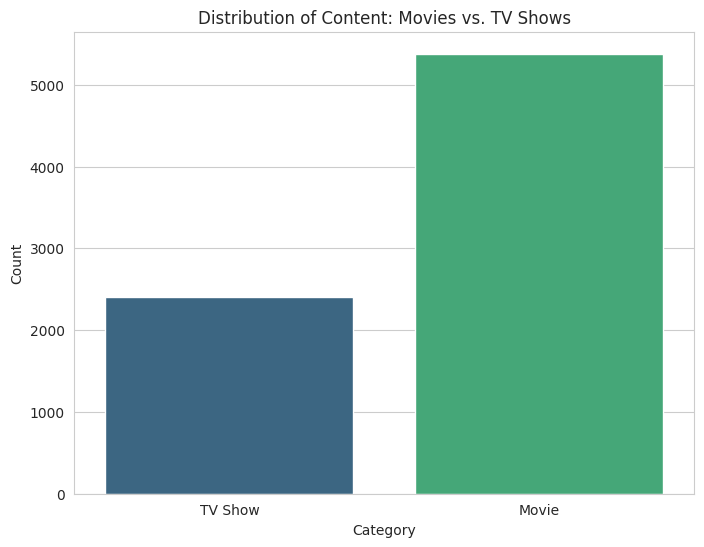


--- Content Counts ---
Category
Movie      5379
TV Show    2410
Name: count, dtype: int64


In [9]:
if df_cleaned is not None and check_column_exists(df_cleaned, 'Category'):
    # Set the size of the plot
    plt.figure(figsize=(8, 6))

    # Create a count plot of the 'Category' column
    sns.countplot(x='Category', data=df_cleaned, palette='viridis')

    # Add a title and labels for clarity
    plt.title('Distribution of Content: Movies vs. TV Shows')
    plt.xlabel('Category')
    plt.ylabel('Count')

    # Show the plot
    plt.show()

    # Print the exact counts for each category
    print("\n--- Content Counts ---")
    print(df_cleaned['Category'].value_counts())

/tmp/ipython-input-3534834288.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='magma')


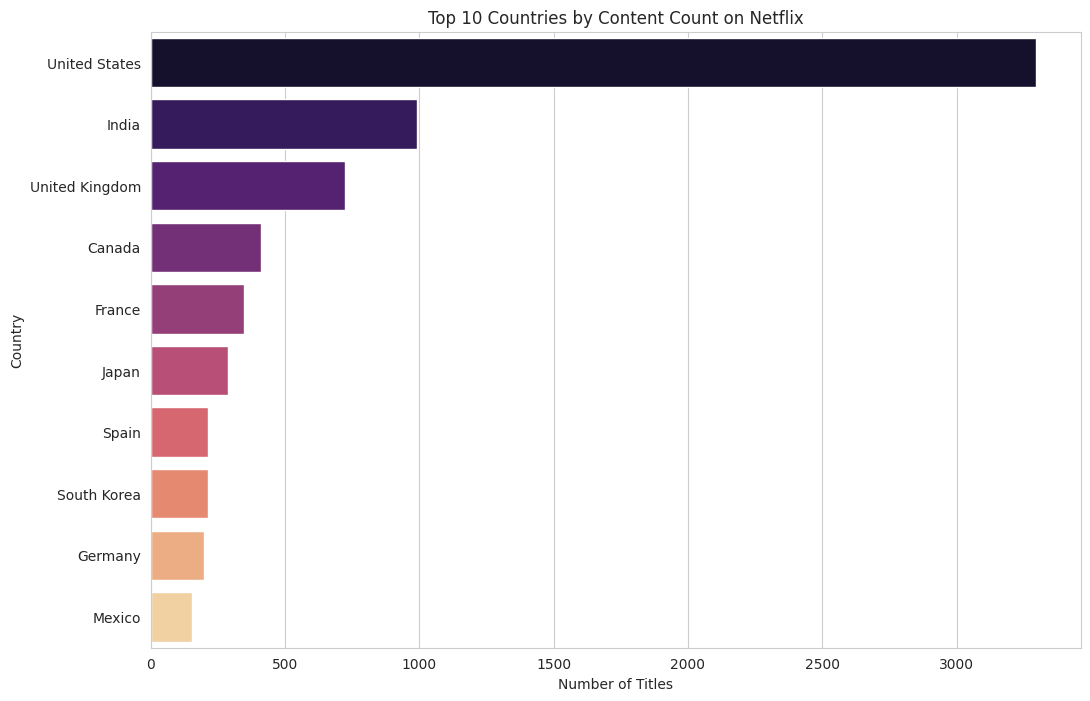


--- Top 10 Country Counts ---
Country
United States     3297
India              990
United Kingdom     722
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Mexico             154
Name: count, dtype: int64


In [11]:
if df_cleaned is not None and check_column_exists(df_cleaned, 'Country'):
    # Filter out rows where the country is 'Unknown' for this analysis
    known_countries_df = df_cleaned[df_cleaned['Country'] != 'Unknown']

    # Split countries and count them
    # Some movies/shows are from multiple countries (e.g., "United States, Canada")
    # We split them and count each country individually
    country_counts = known_countries_df['Country'].str.split(', ').explode().value_counts()

    # Get the top 10 countries
    top_10_countries = country_counts.head(10)

    # Plot the results
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='magma')

    plt.title('Top 10 Countries by Content Count on Netflix')
    plt.xlabel('Number of Titles')
    plt.ylabel('Country')
    plt.show()

    # Print the exact counts
    print("\n--- Top 10 Country Counts ---")
    print(top_10_countries)

/tmp/ipython-input-2370081023.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='viridis')


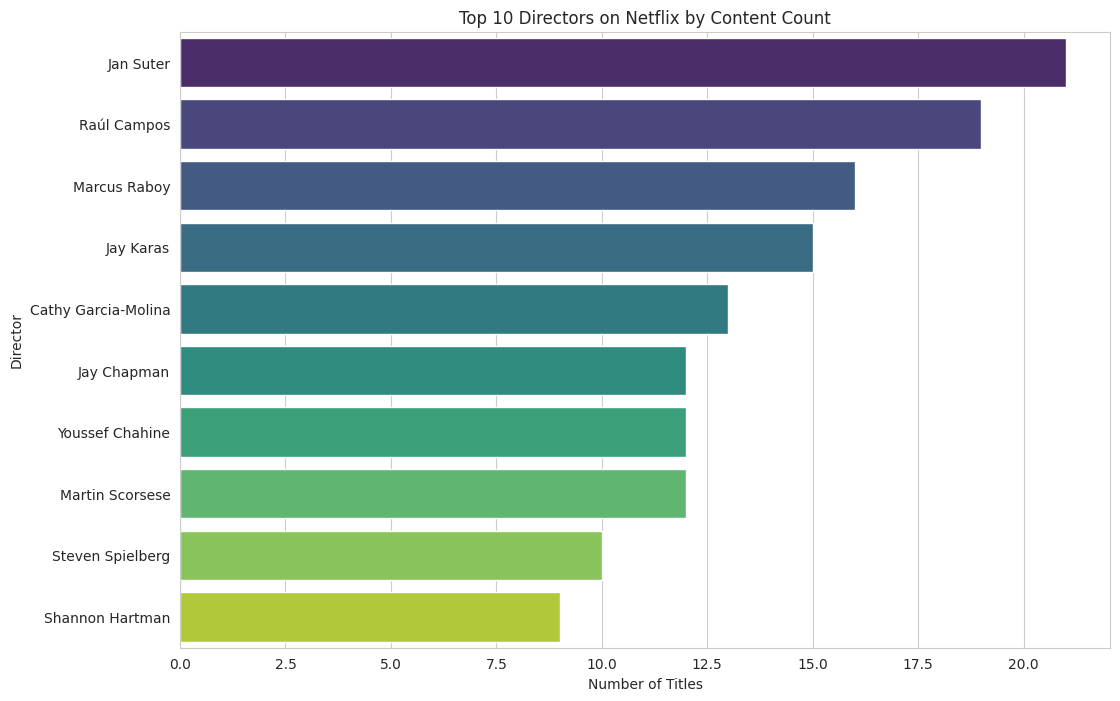


--- Top 10 Director Counts ---
Director
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Steven Spielberg       10
Shannon Hartman         9
Name: count, dtype: int64


In [12]:
if df_cleaned is not None and check_column_exists(df_cleaned, 'Director'):
    # Filter out entries where the director is 'Unknown'
    known_directors_df = df_cleaned[df_cleaned['Director'] != 'Unknown']

    # Get the top 10 directors by counting their appearances
    top_10_directors = known_directors_df['Director'].str.split(', ').explode().value_counts().head(10)

    # Plot the results
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='viridis')

    plt.title('Top 10 Directors on Netflix by Content Count')
    plt.xlabel('Number of Titles')
    plt.ylabel('Director')
    plt.show()

    # Print the exact counts
    print("\n--- Top 10 Director Counts ---")
    print(top_10_directors)

/tmp/ipython-input-3021906370.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cast.values, y=top_10_cast.index, palette='plasma')


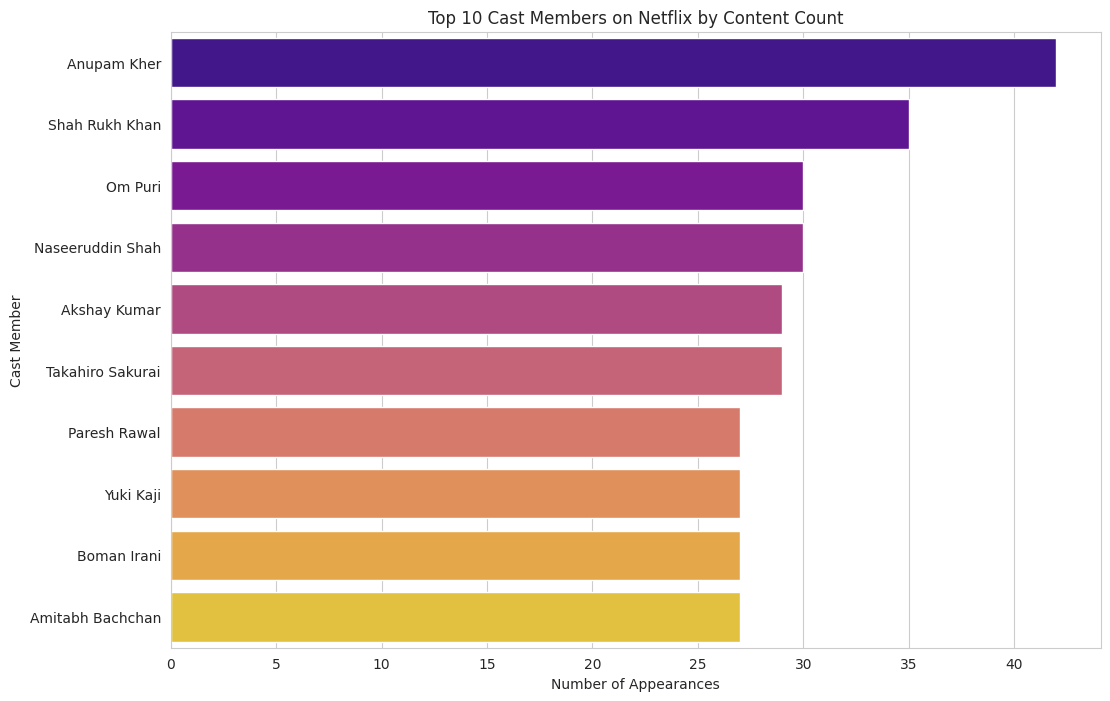


--- Top 10 Cast Member Counts ---
Cast
Anupam Kher         42
Shah Rukh Khan      35
Om Puri             30
Naseeruddin Shah    30
Akshay Kumar        29
Takahiro Sakurai    29
Paresh Rawal        27
Yuki Kaji           27
Boman Irani         27
Amitabh Bachchan    27
Name: count, dtype: int64


In [13]:
if df_cleaned is not None and check_column_exists(df_cleaned, 'Cast'):
    # Filter out entries where the cast is 'Unknown'
    known_cast_df = df_cleaned[df_cleaned['Cast'] != 'Unknown']

    # Split the 'Cast' string by comma and space, then create a new row for each actor
    # This 'explodes' the DataFrame to count each actor individually
    top_10_cast = known_cast_df['Cast'].str.split(', ').explode().value_counts().head(10)

    # Plot the results
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_10_cast.values, y=top_10_cast.index, palette='plasma')

    plt.title('Top 10 Cast Members on Netflix by Content Count')
    plt.xlabel('Number of Appearances')
    plt.ylabel('Cast Member')
    plt.show()

    # Print the exact counts
    print("\n--- Top 10 Cast Member Counts ---")
    print(top_10_cast)

The dominance of Bollywood actors in the top 10 is very noticeable and tells us a lot about the volume of content from India.
Now, let's shift our focus from people to time. We will examine the distribution of content based on its release year to see which eras are most represented on Netflix.

The 'release_year' column is not in this dataset.
Showing the distribution of content based on the year it was added to Netflix instead.



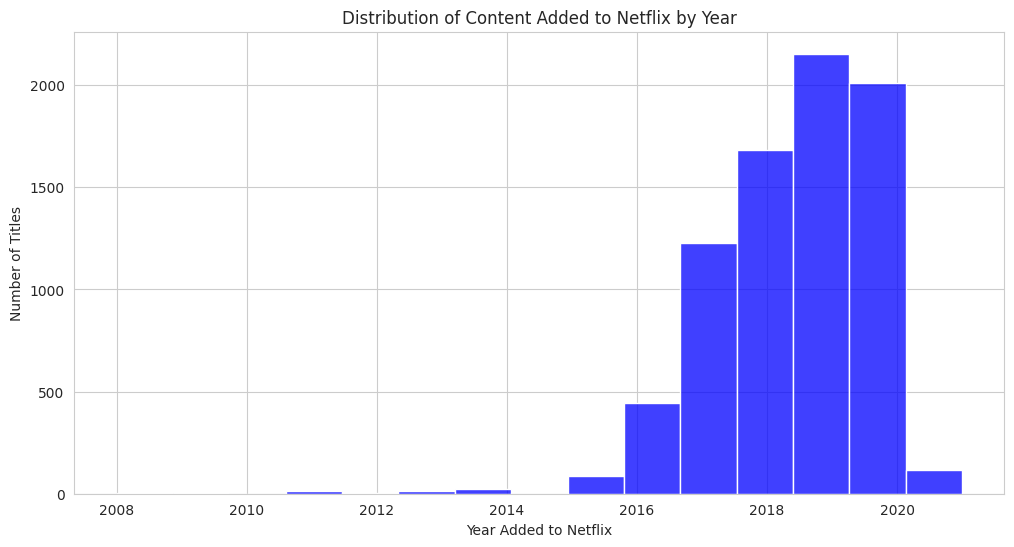

In [14]:
if df_cleaned is not None:
    # We will first check for a 'release_year' column which is common in other versions of this dataset.
    if check_column_exists(df_cleaned, 'release_year'):
        # Plot a histogram of the release years
        plt.figure(figsize=(12, 6))
        sns.histplot(data=df_cleaned, x='release_year', bins=30, kde=False)
        plt.title('Distribution of Content by Original Release Year')
        plt.xlabel('Release Year')
        plt.ylabel('Number of Titles')
        plt.show()
    else:
        # Since 'release_year' is not present, we will plot the year content was added to Netflix.
        # This tells us about Netflix's content acquisition patterns over time.
        print("The 'release_year' column is not in this dataset.")
        print("Showing the distribution of content based on the year it was added to Netflix instead.\n")
        if check_column_exists(df_cleaned, 'added_year'):
            plt.figure(figsize=(12, 6))
            sns.histplot(df_cleaned['added_year'].dropna(), bins=15, kde=False, color='blue')
            plt.title('Distribution of Content Added to Netflix by Year')
            plt.xlabel('Year Added to Netflix')
            plt.ylabel('Number of Titles')
            plt.show()

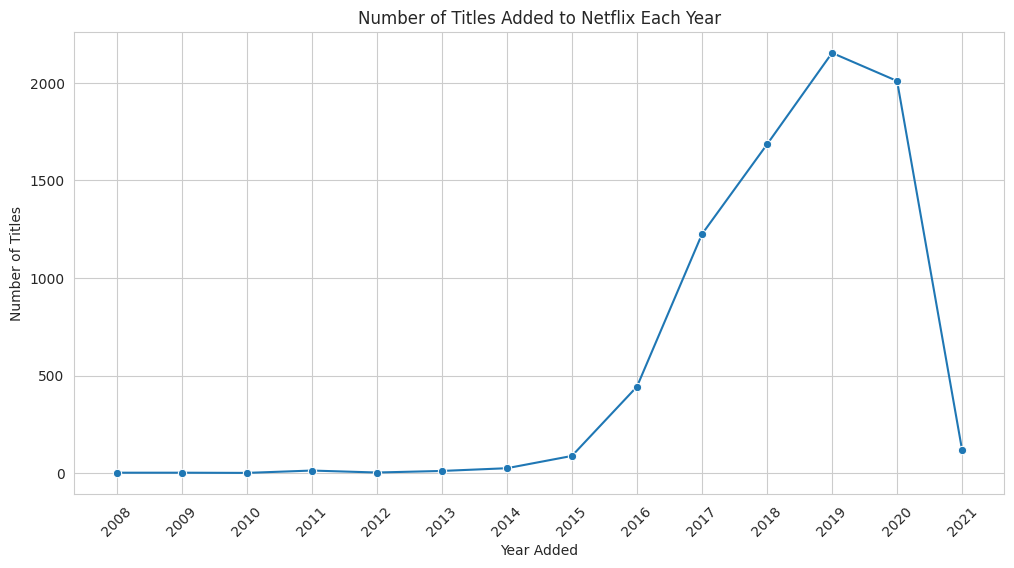

In [15]:
if df_cleaned is not None and check_column_exists(df_cleaned, 'added_year'):
    # Group by the 'added_year' and count the number of titles for each year
    titles_per_year = df_cleaned['added_year'].value_counts().sort_index()

    # Create the line plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=titles_per_year.index, y=titles_per_year.values, marker='o')

    # Set the title and labels
    plt.title('Number of Titles Added to Netflix Each Year')
    plt.xlabel('Year Added')
    plt.ylabel('Number of Titles')

    # Ensure x-axis ticks are integers
    plt.xticks(titles_per_year.index.astype(int))
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

The line chart clearly illustrates the rapid expansion of Netflix's library. The sharp drop in 2021 is likely because the dataset only contains information up to early 2021.

/tmp/ipython-input-2566199531.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='cubehelix')


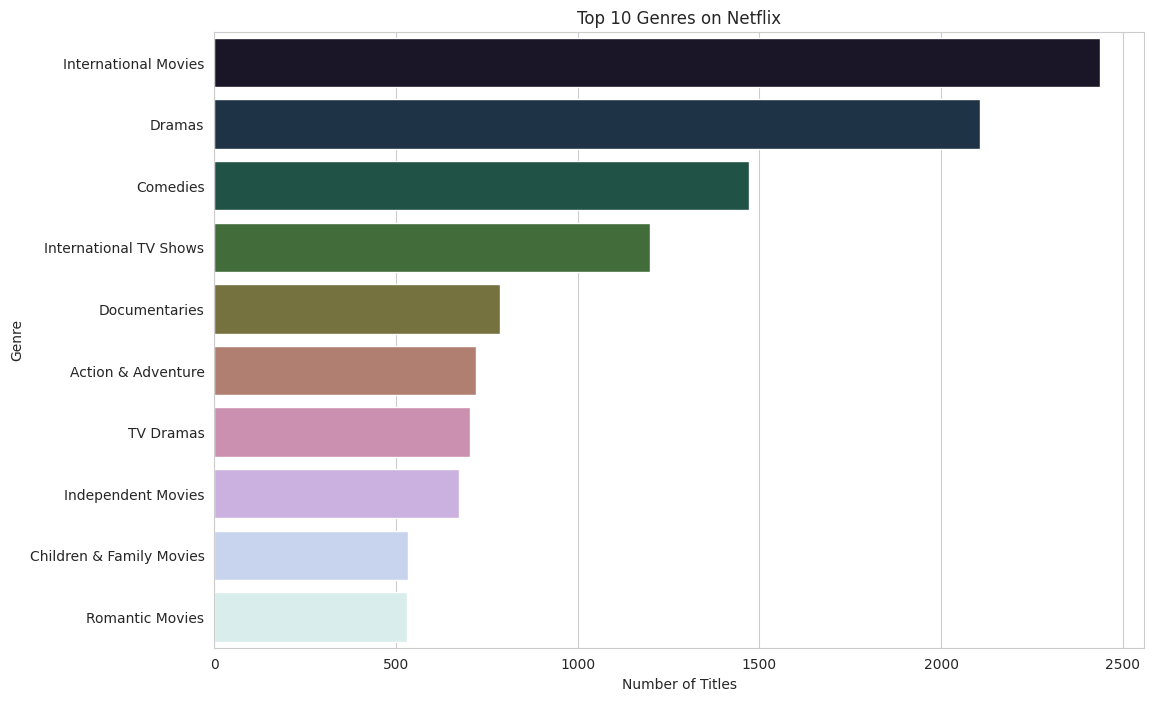


--- Top 10 Genre Counts ---
listed_in
International Movies        2437
Dramas                      2108
Comedies                    1472
International TV Shows      1199
Documentaries                786
Action & Adventure           721
TV Dramas                    704
Independent Movies           675
Children & Family Movies     532
Romantic Movies              531
Name: count, dtype: int64


In [16]:
# The 'Type' column in this dataset contains the genre information. Let's rename it for clarity.
if 'Type' in df_cleaned.columns:
    df_cleaned.rename(columns={'Type': 'listed_in'}, inplace=True)

if df_cleaned is not None and check_column_exists(df_cleaned, 'listed_in'):
    # Split the genres, as each title can have multiple genres listed
    genre_counts = df_cleaned['listed_in'].str.split(', ').explode().value_counts()

    # Get the top 10 genres
    top_10_genres = genre_counts.head(10)

    # Plot the top 10 genres
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='cubehelix')

    plt.title('Top 10 Genres on Netflix')
    plt.xlabel('Number of Titles')
    plt.ylabel('Genre')
    plt.show()

    # Print the exact counts
    print("\n--- Top 10 Genre Counts ---")
    print(top_10_genres)

In [17]:
print(df.columns)

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')


/tmp/ipython-input-593101965.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='duration_minutes', data=df_cleaned, palette='pastel')


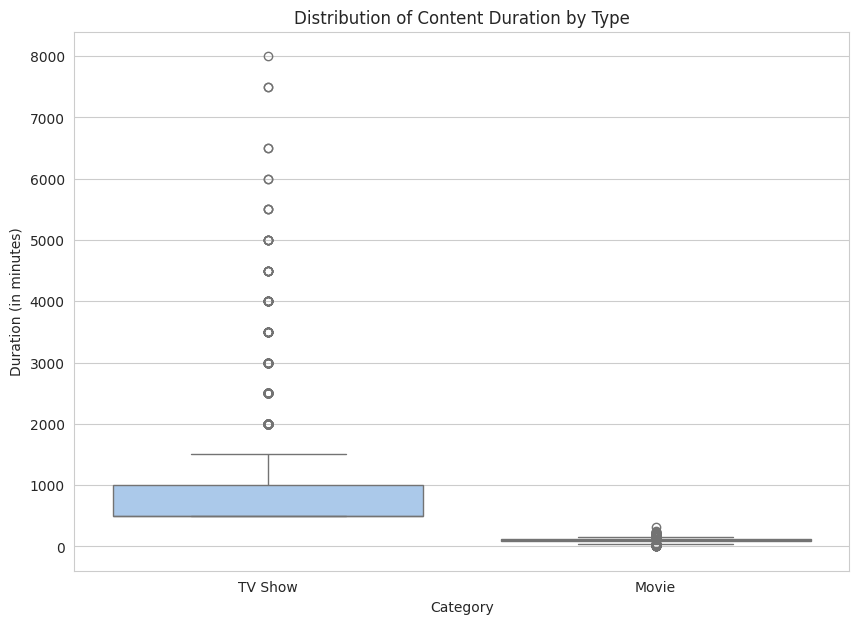

In [18]:
if df_cleaned is not None and all(check_column_exists(df_cleaned, col) for col in ['Category', 'duration_minutes']):
    # Create a boxplot to compare the distributions of durations for Movies and TV Shows
    plt.figure(figsize=(10, 7))
    sns.boxplot(x='Category', y='duration_minutes', data=df_cleaned, palette='pastel')

    # Add a title and labels
    plt.title('Distribution of Content Duration by Type')
    plt.xlabel('Category')
    plt.ylabel('Duration (in minutes)')

    # Show the plot
    plt.show()

/tmp/ipython-input-2381079623.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df_cleaned, palette='coolwarm', order=df_cleaned['Rating'].value_counts().index)


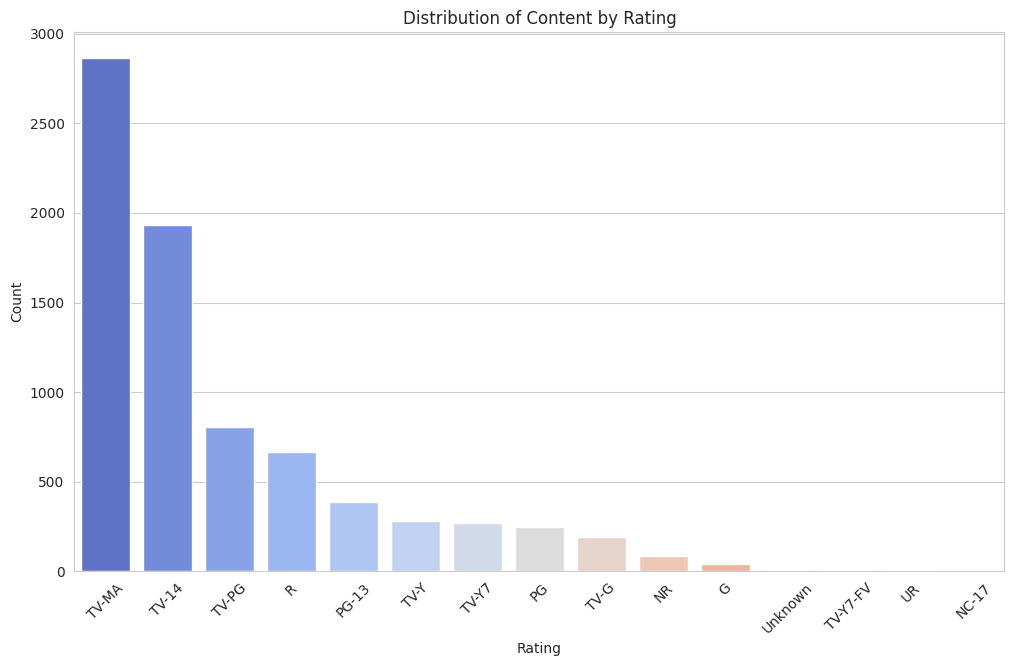


--- Rating Counts ---
Rating
TV-MA       2865
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
Unknown        7
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64


In [19]:
if df_cleaned is not None and check_column_exists(df_cleaned, 'Rating'):
    # Set the size of the plot
    plt.figure(figsize=(12, 7))

    # Create a count plot, ordering the bars from most frequent to least frequent
    sns.countplot(x='Rating', data=df_cleaned, palette='coolwarm', order=df_cleaned['Rating'].value_counts().index)

    # Add a title and labels
    plt.title('Distribution of Content by Rating')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.xticks(rotation=45) # Rotate labels to prevent overlap

    # Show the plot
    plt.show()

    # Print the exact counts
    print("\n--- Rating Counts ---")
    print(df_cleaned['Rating'].value_counts())

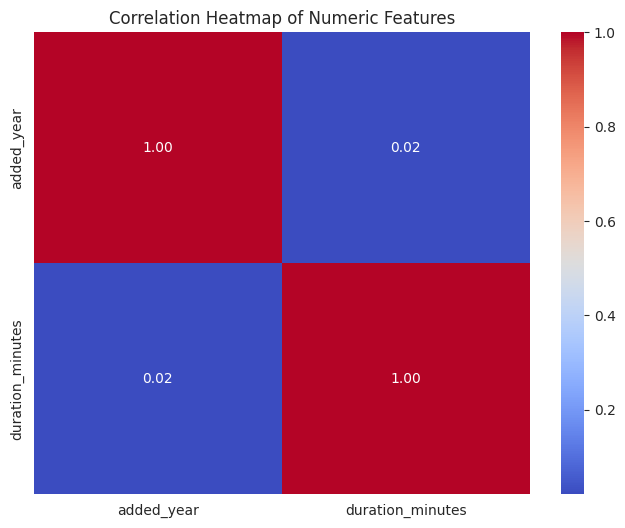

In [20]:
if df_cleaned is not None:
    # Select only the numeric columns from the DataFrame for the correlation analysis
    numeric_cols = ['added_year', 'duration_minutes']

    # Check if the required numeric columns exist
    if all(col in df_cleaned.columns for col in numeric_cols):
        # Calculate the correlation matrix
        corr_matrix = df_cleaned[numeric_cols].corr()

        # Set up the matplotlib figure
        plt.figure(figsize=(8, 6))

        # Draw the heatmap
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

        plt.title('Correlation Heatmap of Numeric Features')
        plt.show()
    else:
        print("Could not find the necessary numeric columns ('added_year', 'duration_minutes') to create a heatmap.")

## Feature Engineering

In this section, we will create new columns (features) from our existing data. This can help reveal deeper insights and is a crucial step if we want to build a predictive model later.

In [22]:
if df_cleaned is not None and check_column_exists(df_cleaned, 'listed_in'):
    # Create a new column 'num_genres' that counts the number of genres for each title
    df_cleaned['num_genres'] = df_cleaned['listed_in'].apply(lambda x: len(x.split(', ')))

    print("Created 'num_genres' column.")
    # Show the title, listed_in, and the new num_genres column for a few rows
    display(df_cleaned[['Title', 'listed_in', 'num_genres']].sample(5))

Created 'num_genres' column.


,Title,listed_in,num_genres
3900,Mandi,"Dramas, Independent Movies, International Movies",3
6170,The Boys in the Band: Something Personal,"Documentaries, LGBTQ Movies",2
3190,Jo Koy: Live from Seattle,Stand-Up Comedy,1
2515,Grand Masti,"Comedies, International Movies, Music & Musicals",3
2239,Forever Chape,"Documentaries, International Movies, Sports Mo...",3


In [23]:
if df_cleaned is not None and check_column_exists(df_cleaned, 'Director'):
    # Create a new column 'has_director'
    # It will be 1 if the Director is not 'Unknown', and 0 otherwise.
    df_cleaned['has_director'] = df_cleaned['Director'].apply(lambda x: 0 if x == 'Unknown' else 1)

    print("Created 'has_director' column.")
    # Show a sample of rows to check the new column against the original Director column
    display(df_cleaned[['Title', 'Director', 'has_director']].sample(5))

Created 'has_director' column.


,Title,Director,has_director
1630,Dave Chappelle: Equanimity & The Bird Revelation,Stan Lathan,1
776,Be Somebody,Joshua Caldwell,1
7690,XXx,Rob Cohen,1
2194,Fitoor,Abhishek Kapoor,1
288,Abstract: The Art of Design,Unknown,0


In [24]:
if df_cleaned is not None and check_column_exists(df_cleaned, 'Country'):
    # First, let's identify the top 5 countries
    top_5_countries_list = df_cleaned['Country'].str.split(', ').explode().value_counts().head(5).index
    print(f"Top 5 countries are: {list(top_5_countries_list)}")

    # A function to check if a title's country is in the top 5
    def is_top_country(country_str):
        if any(c in country_str for c in top_5_countries_list):
            return country_str
        return 'Other'

    # Create the new column
    df_cleaned['country_top5'] = df_cleaned['Country'].apply(is_top_country)

    print("\nCreated 'country_top5' column.")
    # Show a sample of the new column
    display(df_cleaned[['Title', 'Country', 'country_top5']].sample(10))

Top 5 countries are: ['United States', 'India', 'United Kingdom', 'Unknown', 'Canada']

Created 'country_top5' column.


,Title,Country,country_top5
2144,Felipe Neto: My Life Makes No Sense,Brazil,Other
5837,Stranger Things,United States,United States
5971,Tales by Light,Australia,Other
735,Barbie Dreamhouse Adventures,"United States, Canada","United States, Canada"
3431,Kodachrome,"Canada, United States","Canada, United States"
73,18 Presents,Italy,Other
6844,The Runner,United States,United States
6246,The Craft,United States,United States
7602,White Lines,"United Kingdom, Spain","United Kingdom, Spain"
2829,Hotel Transylvania 3: Summer Vacation,United States,United States


In [25]:
if df_cleaned is not None:
    # Define the name for the output file
    output_filename = 'Netflix_Dataset_Cleaned.csv'

    # Save the cleaned DataFrame to a new CSV file without the pandas index
    df_cleaned.to_csv(output_filename, index=False)

    print(f"Cleaned data saved successfully to '{output_filename}'")
else:
    print("DataFrame not loaded. No file to save.")

Cleaned data saved successfully to 'Netflix_Dataset_Cleaned.csv'


## Insights & Conclusions

Based on our analysis of the Netflix dataset, we can draw several strategic conclusions:

*   **Dominance of Movie Content:** The Netflix library is heavily skewed towards movies, with more than twice as many movies as TV shows. This suggests a content strategy that may prioritize single-viewing experiences over longer-running series.

*   **Aggressive Library Growth:** The period between 2017 and 2019 saw a massive increase in the number of titles added to the platform. This indicates a phase of aggressive expansion to build a large and diverse content library to attract subscribers.

*   **Focus on Mature Audiences:** The most common content ratings are TV-MA (Mature Audiences) and TV-14. This shows a clear focus on adult and older teen demographics, with significantly less content targeted at younger children.

*   **Strong US and Indian Market Focus:** The United States is the primary source of content, but India is a strong second. This is further supported by the fact that the list of most frequent actors is dominated by Bollywood stars, highlighting a key strategic focus on the large Indian market.

*   **Broad Genre Appeal:** The most popular genres are "International Movies," "Dramas," and "Comedies." This indicates a strategy aimed at acquiring content with broad, cross-cultural appeal rather than focusing on niche categories.

## Strategic Recommendations

Based on the analysis, here are several strategic recommendations for Netflix's future content strategy:

1.  **Diversify TV Show Production:** While movies are the dominant category, TV shows are known to drive subscriber retention. Netflix should consider increasing its investment in TV shows, particularly in high-performing genres like "International TV Shows" and "TV Dramas," to better balance its catalog and keep users engaged long-term.

2.  **Expand into Family-Friendly Content:** The data shows a heavy concentration of content for mature audiences (TV-MA, R, TV-14). To compete more effectively with platforms like Disney+, Netflix could invest more in the "Children & Family Movies" and "TV-G" rated categories, which are currently underrepresented.

3.  **Double Down on Key International Markets:** The strong presence of Indian content and actors highlights the success of targeted international production. Netflix should continue to invest heavily in India and also consider expanding its local-language production in other top-10 markets like the UK, Japan, and South Korea, which have shown significant presence in the catalog.

4.  **Leverage Genre Combinations:** The most popular content often falls into multiple genres (e.g., "Dramas, International Movies"). Netflix should continue to acquire and produce content that blends these popular categories, such as international comedies and action/adventure dramas, to maximize audience appeal.